<a href="https://colab.research.google.com/github/Nickguild1993/machine_learning_models/blob/main/Diving_back_into_classificationML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import dependencies 

import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# import dataset
from google.colab import files
uploaded = files.upload()


Saving starter_classification_ds.csv to starter_classification_ds.csv


In [5]:
# read in data and set it as a DataFrame (tabular data format akin to an excel table)
import io

df = pd.read_csv(io.BytesIO(uploaded["starter_classification_ds.csv"]))

# check the dataframe

df.sample(5)

,age,interest,success
206,18.227523,50.523275,1
180,14.980555,31.206160,0
241,39.697616,68.606495,1
74,30.140476,10.352902,0
240,16.738480,60.167703,1


In [6]:
# summary table

df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


What this tells us is that we don't have any null values (all counts are the same) The min for interest is a negative number, which seems weird?  We'll check on that value specifically to see if it's an outlier, or if there are multiple values in that column with negative figures.



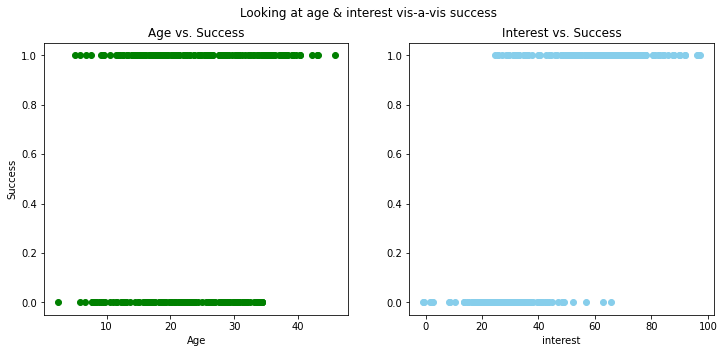

In [33]:
# Plot the data to get a sense of what we're dealing with.

fig, ax = plt.subplots(1, 2, figsize = (12,5))
fig.suptitle("Looking at age & interest vis-a-vis success")

ax[0].scatter(df["age"], df["success"], c="green")
ax[0].set_title("Age vs. Success")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Success")
# interest vs success
ax[1].scatter(df["interest"], df["success"], c="skyblue")
ax[1].set_title("Interest vs. Success")
ax[1].set_xlabel("interest")
ax[1].set_label("success")

# show em
plt.show()

Data Preprocessing!

In [11]:
unsplit_data = df.copy()
inputs = unsplit_data.drop("success", axis=1)
targets = unsplit_data["success"]

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(inputs, targets, train_size=.40, shuffle = True, random_state=1)

In [17]:
X_train_unscaled = X_train_unscaled.reset_index(drop = True)
X_test_unscaled = X_test_unscaled.reset_index(drop = True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f' X-train shape:{X_train_unscaled.shape}, X-test shape:{X_test_unscaled.shape}, y_train shape: {y_train.shape}, y_test shape:{y_test.shape}')

 X-train shape:(118, 2), X-test shape:(179, 2), y_train shape: (118,), y_test shape:(179,)


In [18]:
# Standardize the data
# import scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [21]:
# alias StandardScaler, fit the data

scaler = StandardScaler()
scaler.fit(X_train_unscaled)

X_train_scaled = scaler.transform(X_train_unscaled)
X_test_scaled = scaler.transform(X_test_unscaled)
print(f'Scaled X_train shape: {X_train_scaled.shape}, Scaled_X_test shape: {X_test_scaled.shape}')

Scaled X_train shape: (118, 2), Scaled_X_test shape: (179, 2)


## Random Forest Model

In [52]:
# import RF libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [23]:
# alias and fit

rf = RandomForestClassifier()
rf.fit(X_train_unscaled, y_train)

RandomForestClassifier()

In [24]:
features = X_train_unscaled.columns.values.tolist()
# features are your predicting variables
rf_summary = pd.DataFrame(rf.feature_importances_, index = features, columns = ["Importance"])
rf_summary

,Importance
age,0.272422
interest,0.727578


In [26]:
# Checking Accuracy for RF model train/test sets

rf_train_accuracy = round(rf.score(X_train_unscaled, y_train),4)
rf_test_accuracy= round(rf.score(X_test_unscaled, y_test),4)
print(f'Train Accuracy: {rf_train_accuracy}, Test Accuracy: {rf_test_accuracy}')

# Train Accuracy: 1.0 / Test Accuracy: .9385
# Could improve the test accuracy by increasing the training set size, but then you run into an overfitting situation.

Train Accuracy: 1.0, Test Accuracy: 0.9385


In [54]:
# making predictions for the test set
y_pred_rf = rf.predict(X_test_unscaled)

# building confusion matrix and classification report

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf_df = pd.DataFrame(
    cm_rf, index =["Is Successful", "Is not Successful"], columns = ["Predicted Success", "Predicted Unsuccessful"]
)
cm_rf_df
print("Random Forest Confusion Matrix")
display(cm_rf_df)
print(f' Accuracy Score: {rf_test_accuracy}')
print(classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix


,Predicted Success,Predicted Unsuccessful
Is Successful,76,5
Is not Successful,6,92


 Accuracy Score: 0.9385
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        81
           1       0.95      0.94      0.94        98

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179



## Logistic Regression!

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
# creating bias weights table

bias_weights = [np.round(log_reg.intercept_[0],4), np.round(log_reg.coef_[0,0],4), np.round(log_reg.coef_[0,1],4)]
# inputs = unsplit_data.drop("success", axis=1) - from about 10 cells up.
col_names = inputs.columns.values.tolist()
col_names = ["bias"] + col_names

log_reg_summary = pd.DataFrame(data= bias_weights, index= col_names, columns = ["Weights"])
log_reg_summary

,Weights
bias,0.9155
age,0.3715
interest,2.6308


In [51]:
log_reg_score = log_reg.score(X_train_scaled, y_train)
print("The Logistic Regression Train Accuracy Score is:", log_reg_score)

The Logistic Regression Train Accuracy Score is: 0.8983050847457628


In [48]:
# Accuracy rates for Logistic Regression train/test sets

log_reg_train_accuracy = round(log_reg.score(X_train_scaled, y_train), 4)
log_reg_test_accuracy = round(log_reg.score(X_test_scaled, y_test), 4)
# using \n creates a line break in the output
print(f'Train Accuracy: {log_reg_train_accuracy} \nTest Accuracy {log_reg_test_accuracy}')

Train Accuracy: 0.8983 
Test Accuracy 0.8659


In [56]:
# making predictions for the test set
y_pred_lr = log_reg.predict(X_test_scaled)

# building confusion matrix and classification report

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr_df = pd.DataFrame(
    cm_lr, index =["Is Successful", "Is not Successful"], columns = ["Predicted Success", "Predicted Unsuccessful"]
)
print("Logistic Regression Confusion Matrix")
display(cm_lr_df)

print(f'Accuracy Score: {log_reg_test_accuracy}')
print("Classification Report")

print(classification_report(y_test, y_pred_lr))

Logistic Regression Confusion Matrix


,Predicted Success,Predicted Unsuccessful
Is Successful,75,6
Is not Successful,18,80


Accuracy Score: 0.8659
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        81
           1       0.93      0.82      0.87        98

    accuracy                           0.87       179
   macro avg       0.87      0.87      0.87       179
weighted avg       0.87      0.87      0.87       179



## Support Vector Machine (SVM)

In [57]:
# Import SVM dependencies from sklearn

from sklearn.svm import SVC

In [58]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)



SVC()

In [60]:
# Accuracy for train and test sets

svm_model_train_acc = round(svm_model.score(X_train_scaled, y_train),4)
svm_model_test_acc = round(svm_model.score(X_test_scaled, y_test),4)
print(f'Train Accuracy: {svm_model_train_acc} \nTest Accuracy: {svm_model_test_acc}')

Train Accuracy: 0.9237 
Test Accuracy: 0.8994


In [62]:
# Confusion Martix and Classification Report
y_pred_svm = svm_model.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, y_pred_svm)

cm_svm_df = pd.DataFrame(
    cm_svm, index=["Is Successful", "Is not Succesful"], columns = ["Predicted Successful", "Predicted Unsucessful"]
)

print("Support Vector Machine Confusion Matrix")
display(cm_svm_df)
# print accuracy score
print(f'Accuracy Score {svm_model_test_acc}')

print("Classification Report")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Confusion Matrix


,Predicted Successful,Predicted Unsucessful
Is Successful,75,6
Is not Succesful,12,86


Accuracy Score 0.8994
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        81
           1       0.93      0.88      0.91        98

    accuracy                           0.90       179
   macro avg       0.90      0.90      0.90       179
weighted avg       0.90      0.90      0.90       179



## K-Nearest Neighbors (KNN)

In [63]:
# KNN Dependencies

from sklearn.neighbors import KNeighborsClassifier

In [64]:
# Fit the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [65]:
# KNN Accuracy for train/test sets

knn_model_train_acc = round(knn_model.score(X_train_scaled, y_train),4)
knn_model_test_acc = round(knn_model.score(X_test_scaled, y_test),4)

print(f'Train Accuracy: {knn_model_train_acc} \nTest Accuracy: {knn_model_test_acc} ')


Train Accuracy: 0.9407 
Test Accuracy: 0.9106 


In [70]:
# KNN Confusion matrix and classication report

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_lr)

cm_knn_df = pd.DataFrame(cm_knn,
    index=["Is Successful", "Is not Succesful"], columns=["Predicted Successful","Predicted Unsuccessful" ]
)

print("K-Nearest Neighbors Confusion Matrix")
display(cm_knn_df)

print(f'Accuracy Score: {knn_model_test_acc}')

print("Classification Report")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Confusion Matrix


,Predicted Successful,Predicted Unsuccessful
Is Successful,75,6
Is not Succesful,18,80


Accuracy Score: 0.9106
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        81
           1       0.90      0.94      0.92        98

    accuracy                           0.91       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.91      0.91      0.91       179

